# Força bruta
A abordagem força bruta para encontrar o par de pontos mais próximos consiste em comparar a distância entre todos os pares possíveis de pontos e manter o menor valor encontrado durante esse processo.

## Explicacao detalhada

🎯 **Entrada:**

Um conjunto $P$ com $n$ pontos no plano 2D. Cada ponto é uma tupla ou objeto com coordenadas $(x, y)$.

🔄 **Lógica:**

1. Inicialize uma variável para armazenar a **menor distância encontrada até agora**, começando com infinito.
2. Percorra **todos os pares de pontos** no conjunto.
3. Para cada par, calcule a **distância euclidiana**.
4. Se essa distância for **menor do que a atual menor distância**, atualize a menor distância e guarde o par correspondente.
5. Ao final, retorne o par de pontos com a menor distância.

📐 **Fórmula da distância euclidiana** entre dois pontos $p_1 = (x_1, y_1)$ e $p_2 = (x_2, y_2)$:

$$
d(p_1, p_2) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
$$

> Em código, pode-se usar a raiz quadrada ou simplesmente comparar os **quadrados** das distâncias, se só for necessário saber qual é menor.

# Implementação

## Código base

In [1]:
import time
from typing import List

from src.model.ponto import Ponto

def ponto_mais_proximo_forca_bruta(pontos: List[Ponto]) -> dict:
    """
    Encontra o par de pontos mais próximo entre uma lista de pontos, usando força bruta.
    Também mede o tempo de execução.

    Parameters
    ----------
    pontos : List[Ponto]
        Lista de objetos do tipo Ponto.

    Returns
    -------
    dict
        Um dicionário contendo:
        - 'ponto_1': primeiro ponto do par mais próximo
        - 'ponto_2': segundo ponto do par mais próximo
        - 'distancia': distância entre os dois pontos
        - 'tempo_execucao': tempo em segundos para encontrar o par
    """
    inicio = time.perf_counter()

    menor_dist = float('inf')
    ponto1_mais_prox = None
    ponto2_mais_prox = None

    for i in range(len(pontos)):
        for j in range(i + 1, len(pontos)):
            dist = pontos[i].distancia(pontos[j])
            if dist < menor_dist:
                menor_dist = dist
                ponto1_mais_prox = pontos[i]
                ponto2_mais_prox = pontos[j]

    fim = time.perf_counter()
    tempo_execucao = fim - inicio

    return {
        'ponto_1': ponto1_mais_prox,
        'ponto_2': ponto2_mais_prox,
        'distancia': menor_dist,
        'tempo_execucao': tempo_execucao
    }


## Benchmark

### Função de teste

In [2]:
import matplotlib.pyplot as plt

from src.utils import gerar_pontos

def testar_tempos(n_inicial: int, n_final: int, passo: int, limite: int = 1000):
    """
    Testa o tempo de execução da função de força bruta para diferentes tamanhos de entrada.

    Parameters
    ----------
    n_inicial : int
        Número inicial de pontos.
    n_final : int
        Número final de pontos.
    passo : int
        Incremento de pontos por teste.
    limite : int
        Valor máximo para coordenadas dos pontos.
    """
    tamanhos = []
    tempos = []

    for n in range(n_inicial, n_final + 1, passo):
        pontos = gerar_pontos(n, limite=limite)
        resultado = ponto_mais_proximo_forca_bruta(pontos)
        
        tamanhos.append(n)
        tempos.append(resultado['tempo_execucao'])
        
        print(f"n = {n}, tempo = {resultado['tempo_execucao']:.6f} s")

    # Plotar
    plt.figure(figsize=(10, 6))
    plt.plot(tamanhos, tempos, marker='o', linestyle='-', color='royalblue')
    plt.title('Tempo de Execução vs Número de Pontos (Força Bruta)')
    plt.xlabel('Número de pontos')
    plt.ylabel('Tempo de execução (s)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Resultados

n = 0, tempo = 0.000002 s
n = 100, tempo = 0.000946 s
n = 200, tempo = 0.007186 s
n = 300, tempo = 0.015644 s
n = 400, tempo = 0.023584 s
n = 500, tempo = 0.019858 s
n = 600, tempo = 0.029435 s
n = 700, tempo = 0.037808 s
n = 800, tempo = 0.051528 s
n = 900, tempo = 0.063184 s
n = 1000, tempo = 0.079880 s
n = 1100, tempo = 0.093614 s
n = 1200, tempo = 0.115532 s
n = 1300, tempo = 0.130173 s
n = 1400, tempo = 0.153257 s
n = 1500, tempo = 0.176777 s
n = 1600, tempo = 0.200756 s
n = 1700, tempo = 0.225248 s
n = 1800, tempo = 0.249158 s
n = 1900, tempo = 0.277314 s
n = 2000, tempo = 0.315202 s
n = 2100, tempo = 0.340899 s
n = 2200, tempo = 0.372509 s
n = 2300, tempo = 0.411840 s
n = 2400, tempo = 0.447898 s
n = 2500, tempo = 0.493818 s
n = 2600, tempo = 0.523724 s
n = 2700, tempo = 0.575771 s
n = 2800, tempo = 0.603611 s
n = 2900, tempo = 0.671463 s
n = 3000, tempo = 0.719565 s
n = 3100, tempo = 0.757311 s
n = 3200, tempo = 0.789353 s
n = 3300, tempo = 0.858761 s
n = 3400, tempo = 0.924200

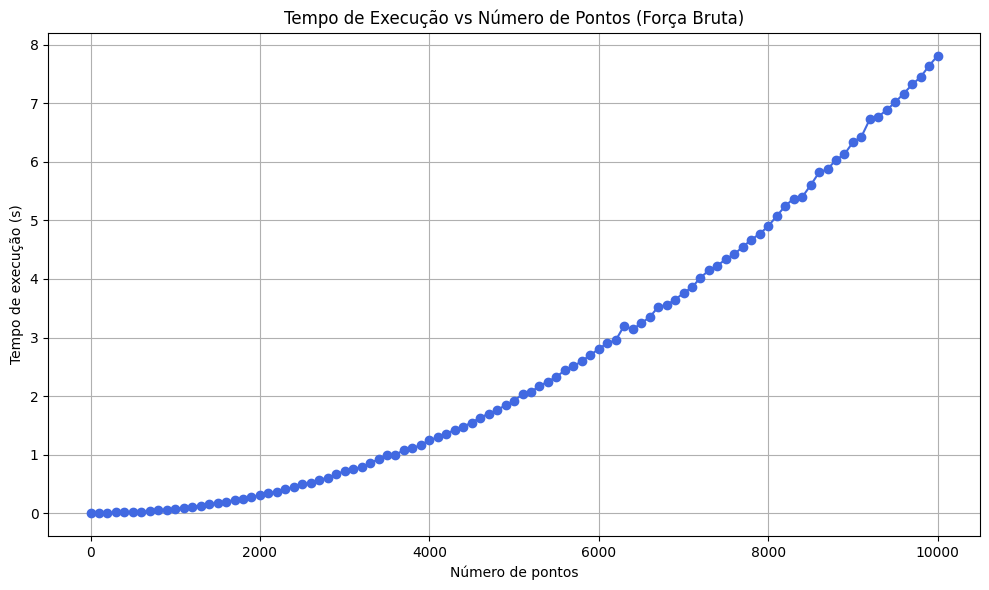

In [3]:
testar_tempos(n_inicial=0, n_final=10000, passo=100,limite=10000)